21022008_NguyenHuuTho

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

drive  sample_data  Tree_Buy_Computer.png


In [ ]:
!pwd

/content


In [ ]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode (connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Xử lý dữ liệu

## Đọc file *.cvs

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/AllElectronics_SS1.csv')
data

,ID,age,income,student,class_buys_computer
0,1,youth,high,no,no
1,2,youth,high,no,no
2,3,middle_aged,high,no,yes
3,4,senior,medium,no,yes
4,5,senior,low,yes,yes
5,6,senior,low,yes,no
6,7,middle_aged,low,yes,yes
7,8,youth,medium,no,no
8,9,youth,low,yes,yes
9,10,senior,medium,yes,yes


## Đọc dữ liệu bằng thư viện Pandas

In [47]:
X = data.iloc[:,:-1] # Thi 50%: Sửa -1
X

,ID,age,income,student
0,1,youth,high,no
1,2,youth,high,no
2,3,middle_aged,high,no
3,4,senior,medium,no
4,5,senior,low,yes
5,6,senior,low,yes
6,7,middle_aged,low,yes
7,8,youth,medium,no
8,9,youth,low,yes
9,10,senior,medium,yes


## Chỉ load dữ liệu từ ở cột quyết định

In [49]:
y = data.iloc[:,4] # Thi 50%: Lấy cột thứ 5 trong bản, cột thứ 5 là cột quyết định
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: class_buys_computer, dtype: object

## Chuyển tất cả các dữ liệu từ text sang số bằng các sử dụng hàm LabelEncoder()

In [50]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,ID,age,income,student
0,0,2,0,0
1,1,2,0,0
2,2,0,0,0
3,3,1,2,0
4,4,1,1,1
5,5,1,1,1
6,6,0,1,1
7,7,2,2,0
8,8,2,1,1
9,9,1,2,1


## Huấn luyện mô hình

In [53]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y) # hàm .fit là Huấn luyện mô hình (train module)
# X_in = np.array([2, 0,0, 0])
X_in = np.array([0,0,0])
y_pred = regressor.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

# Đánh giá độ chính xác 

# Nhận diện chử số viết tay: BƯớc kiểm thử - 

# BTVN: Sử dụng dữ liệu dòng 5 (bất kỳ), trong bảng để trả về không mua máy tính

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['yes'], dtype=object)

## Vẽ cây quyết định và lưu lại với tên 'Tree_Buy_Computer.png'

In [54]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('Tree_Buy_Computer.png')

# Conda: conda install graphviz
# HomeWork : Lưu tấm hình cây với tên, Show ảnh

True

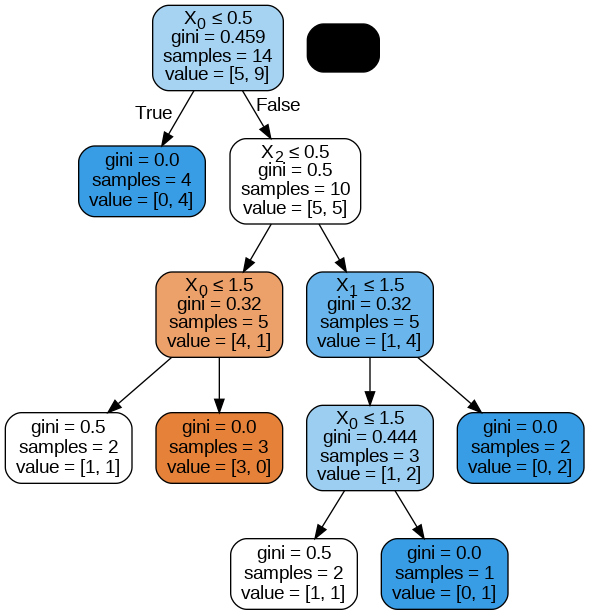

In [55]:
# Lưu tấm hình cây với tên, Show ảnh - Xong
from IPython.display import Image
Image('Tree_Buy_Computer.png')

BÀI TẬP:
- Thay đổi dataset, rùi in ra cây QD - Xong